In [1]:
import pandas as pd

In [48]:
# Часть третья: Анализ датасет c Kaggle.com

# Прочитайте csv файл (используйте функцию read_csv)
books = pd.read_csv("data/bestsellers_with_categories.csv", parse_dates=True)

In [49]:
# Выведите первый пять строчек (используется функцию head)
books.head(5)

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [50]:
# Выведите размеры датасета (используйте атрибут shape)
books.shape

(550, 7)

In [52]:
# Сменить регистр на маленький, а пробел заменить на нижнее подчеркивания
books.columns = books.columns.str.lower().str.replace(' ','_')
books.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [53]:
# Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [54]:
# Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)
books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

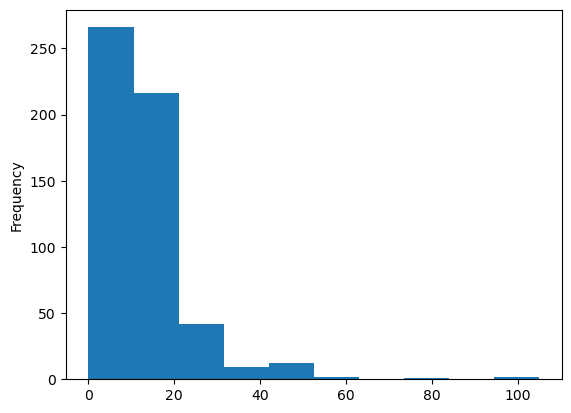

In [55]:
# Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')
books.price.plot(kind='hist')

In [37]:
# Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)
print(books.price.describe())

print(books.price.min())
print(books.price.max())
print(books.price.mean())
print(books.price.median())

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64
0
105
13.1
11.0


In [56]:
# Поиск и сортировка данных
# Ответ: Какой рейтинг в датасете наивысший? Ответ:
books.user_rating.max()

4.9

In [67]:
# Ответ: Сколько книг имеют такой рейтинг? Ответ:
books[books.user_rating == books.user_rating.max()].shape[0]

52

In [69]:
# Ответ: У какой книги больше всего отзывов? Ответ:
books.name[books.reviews == books.reviews.max()]

534    Where the Crawdads Sing
Name: name, dtype: object

In [72]:
# Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ:
books[books.year == 2015].price.max()

46

In [85]:
# Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:
books[(books['genre'] == 'Fiction') & (books['year'] == 2010)].shape[0]

20

In [86]:
# Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:
books[(books.user_rating == books.user_rating.max()) & ((books['year'] == 2010)| (books['year'] == 2011))].shape[0]

1

In [92]:
# И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).
# Ответ: Какая книга последняя в отсортированном списке? Ответ:
books[(books['year'] == 2015) & (books['price'] < 8)].sort_values(by=['price']).iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object